# Sweep BookCrossing Data

## Setup

In [24]:
library(readr)
library(dplyr)
library(reshape2)
library(ggplot2)

In [2]:
options(repr.matrix.max.rows=15, repr.plot.height=4.5)

### Bias

In [ ]:
bias.results = read_csv("build/bx-bias-sweep-results.csv")

In [27]:
bias.results.tall = bias.results %>%
    select(Damping, RMSE.ByUser, Predict.nDCG) %>%
    melt(id.vars = "Damping", variable.name = "Metric")
head(bias.results.tall)

Damping,Metric,value
1,RMSE.ByUser,1.562261
2,RMSE.ByUser,1.529473
3,RMSE.ByUser,1.517921
4,RMSE.ByUser,1.514028
5,RMSE.ByUser,1.513653
6,RMSE.ByUser,1.515096


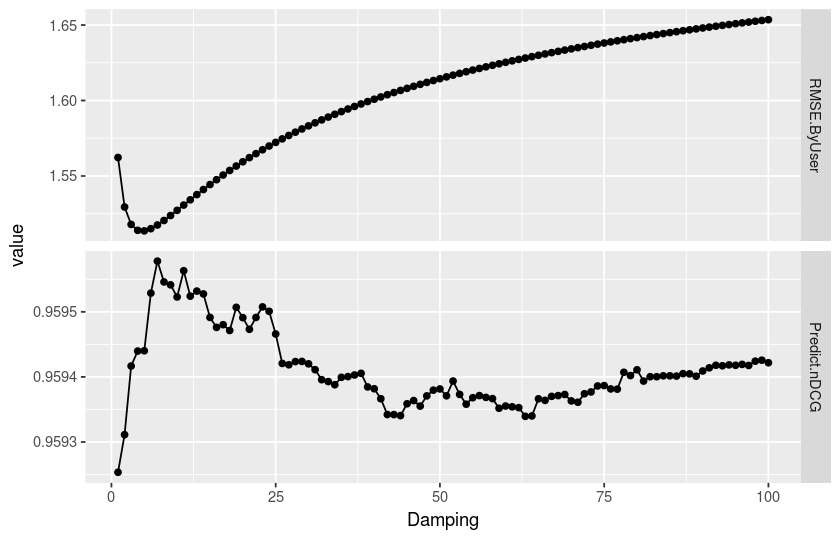

In [28]:
ggplot(bias.results.tall) +
    aes(x=Damping, y=value) +
    geom_point() + geom_line() +
    facet_grid(Metric ~ ., scales="free_y")

Bias damping of **7** looks good. 5 wouldn't be bad either.

We will feed this value foward into the other sweeps.

## Explicit Feedback Recsys

In [3]:
results.explicit = read_csv("build/bx-ratings-sweep-results.csv") %>%
    rename(TopN.nDCG=nDCG)
results.explicit

Parsed with column specification:
cols(
  DataSet = col_character(),
  Algorithm = col_character(),
  Damping = col_integer(),
  FeatureCount = col_integer(),
  NNbrs = col_integer(),
  BuildTime = col_double(),
  TestTime = col_double(),
  RMSE.ByUser = col_double(),
  RMSE.ByRating = col_double(),
  Predict.nDCG = col_double(),
  TopN.nDCG = col_double(),
  MAP = col_double()
)


DataSet,Algorithm,Damping,FeatureCount,NNbrs,BuildTime,TestTime,RMSE.ByUser,RMSE.ByRating,Predict.nDCG,TopN.nDCG,MAP
bx-explicit,Bias,1,NA,NA,1.416,158.961,1.562261,1.687230,0.9592534,0.0004137511,0.0002570759
bx-explicit,Bias,2,NA,NA,0.645,161.917,1.529473,1.654503,0.9593112,0.0007320124,0.0005007552
bx-explicit,Bias,3,NA,NA,0.629,169.447,1.517921,1.643064,0.9594167,0.0014005498,0.0008153528
bx-explicit,Bias,4,NA,NA,0.656,171.547,1.514028,1.639065,0.9594397,0.0018478931,0.0011493359
bx-explicit,ItemItem,NA,NA,5,99.924,724.865,1.548048,1.815056,0.5809573,0.0014989007,0.0015909301
bx-explicit,ItemItem,NA,NA,10,99.920,725.641,1.542411,1.808310,0.5810906,0.0015100563,0.0015955714
bx-explicit,ItemItem,NA,NA,15,99.916,731.384,1.541888,1.807619,0.5811162,0.0015100221,0.0015954628
bx-explicit,ItemItem,NA,NA,20,99.918,732.711,1.541953,1.807609,0.5811064,0.0015101051,0.0015956590
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
bx-explicit,Bias,27,NA,NA,0.601,175.258,1.576848,1.699570,0.9594186,0.007322595,0.007162933


### Summarize

In [4]:
unique(results.explicit$Algorithm)

[1] "Bias"     "ItemItem" "UserUser" "FunkSVD"

### User-User CF

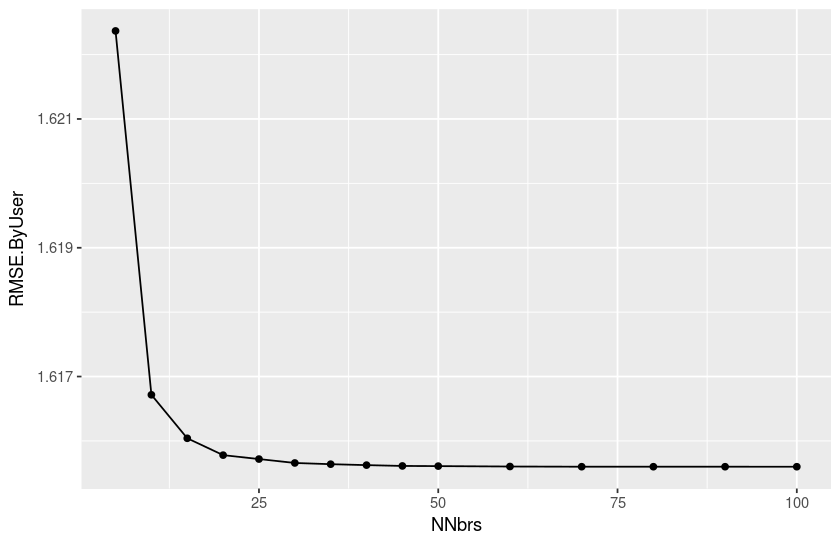

In [5]:
ggplot(results.explicit %>% filter(Algorithm=="UserUser")) +
    aes(x=NNbrs, y=RMSE.ByUser) +
    geom_point() + geom_line()

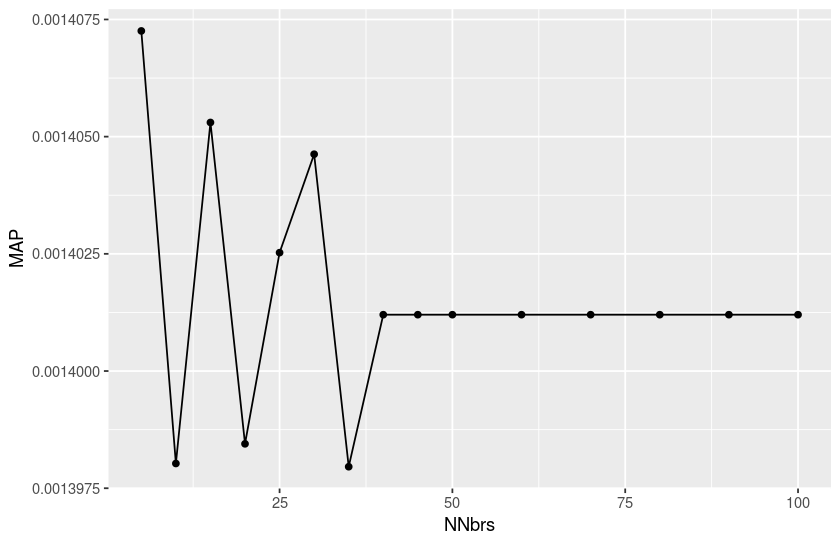

In [6]:
ggplot(results.explicit %>% filter(Algorithm=="UserUser")) +
    aes(x=NNbrs, y=MAP) +
    geom_point() + geom_line()

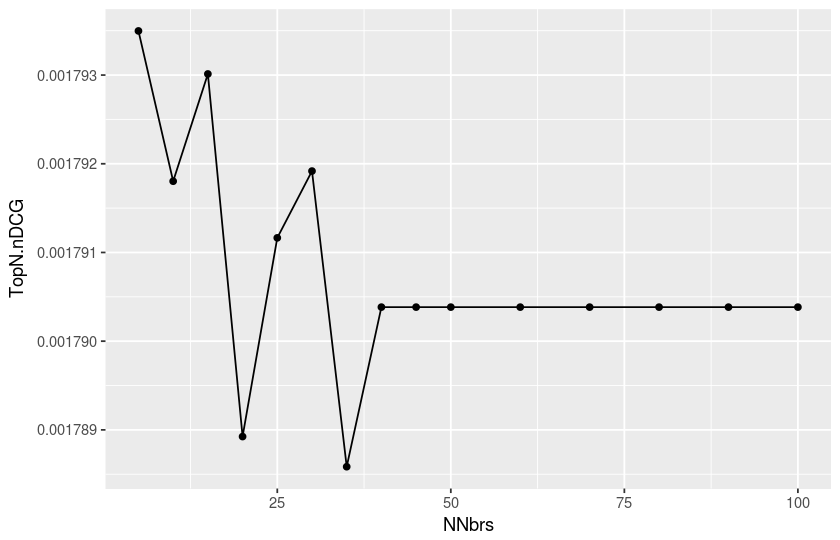

In [8]:
ggplot(results.explicit %>% filter(Algorithm=="UserUser")) +
    aes(x=NNbrs, y=TopN.nDCG) +
    geom_point() + geom_line()

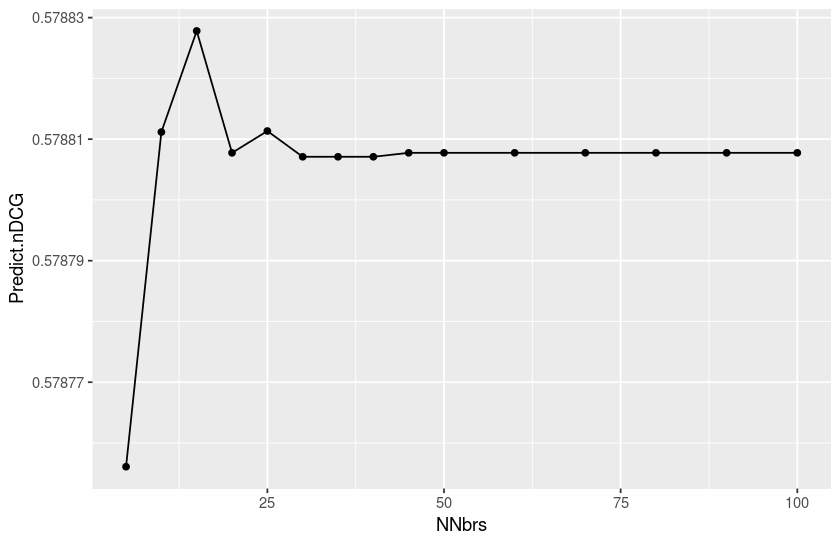

In [7]:
ggplot(results.explicit %>% filter(Algorithm=="UserUser")) +
    aes(x=NNbrs, y=Predict.nDCG) +
    geom_point() + geom_line()

#### Results

Resulting configuration: **15** neighbors.

## Item-Item CF

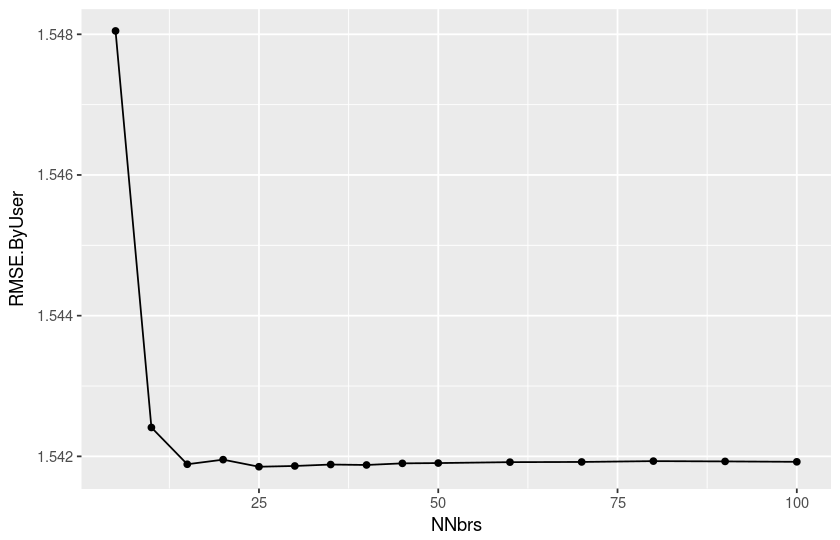

In [9]:
ggplot(results.explicit %>% filter(Algorithm=="ItemItem")) +
    aes(x=NNbrs, y=RMSE.ByUser) +
    geom_point() + geom_line()

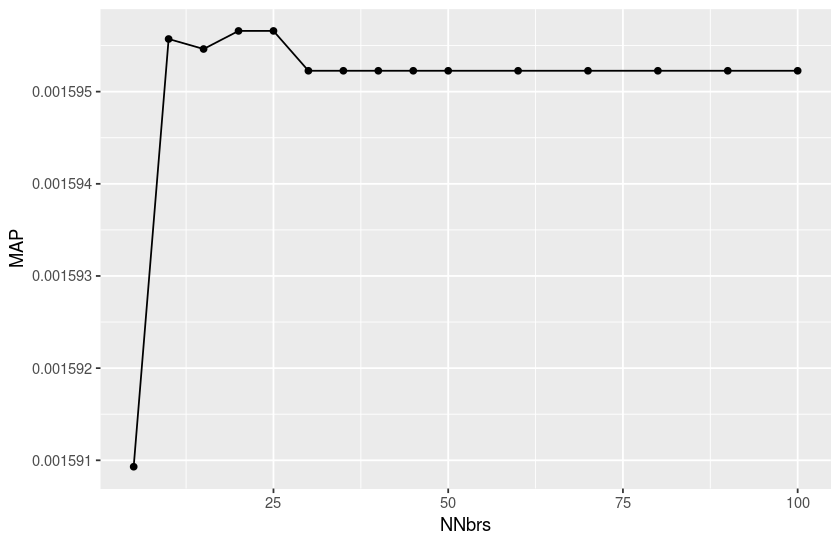

In [10]:
ggplot(results.explicit %>% filter(Algorithm=="ItemItem")) +
    aes(x=NNbrs, y=MAP) +
    geom_point() + geom_line()

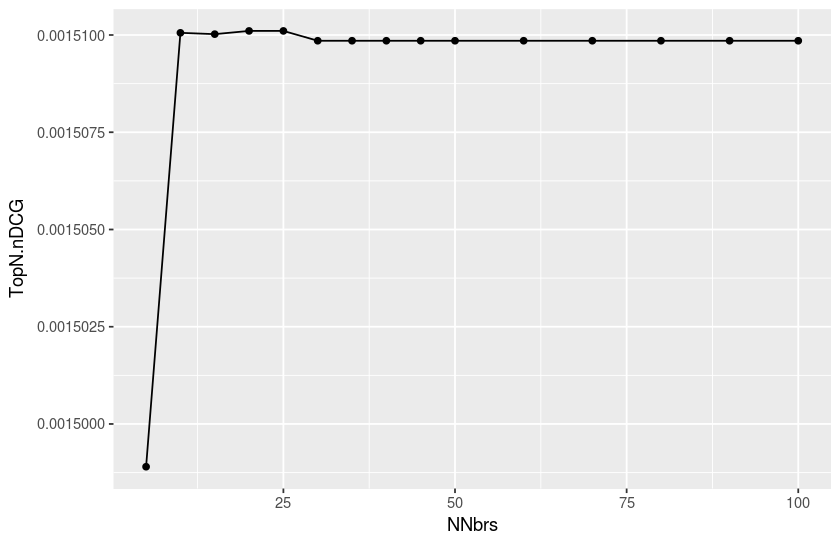

In [11]:
ggplot(results.explicit %>% filter(Algorithm=="ItemItem")) +
    aes(x=NNbrs, y=TopN.nDCG) +
    geom_point() + geom_line()

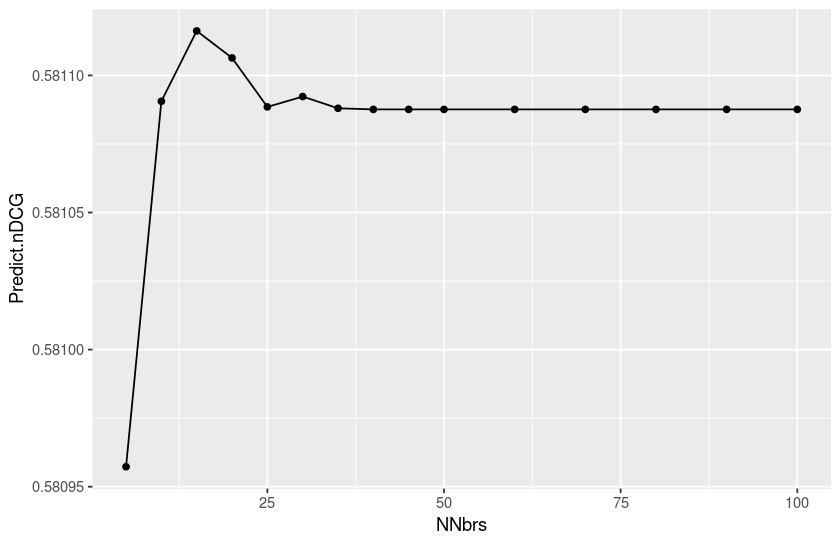

In [12]:
ggplot(results.explicit %>% filter(Algorithm=="ItemItem")) +
    aes(x=NNbrs, y=Predict.nDCG) +
    geom_point() + geom_line()

#### Results

Resulting configuration: **15** neighbors.

### FunkSVD

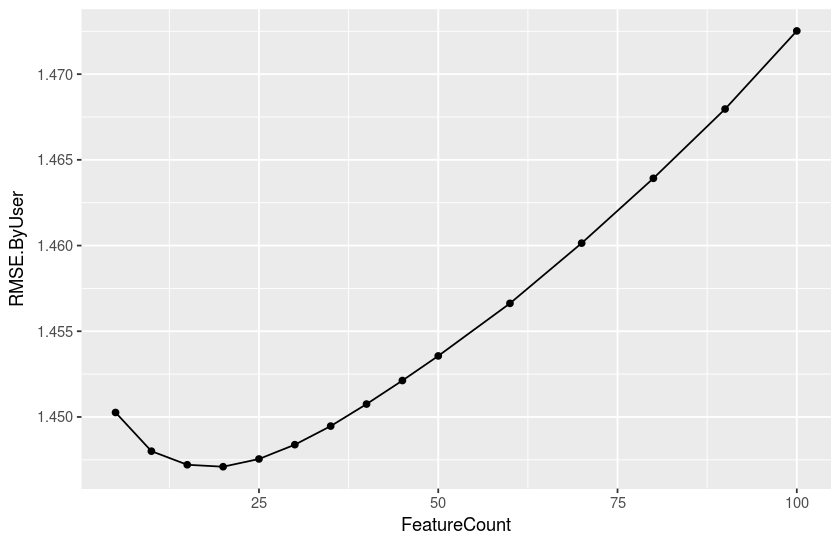

In [13]:
ggplot(results.explicit %>% filter(Algorithm=="FunkSVD")) +
    aes(x=FeatureCount, y=RMSE.ByUser) +
    geom_point() + geom_line()

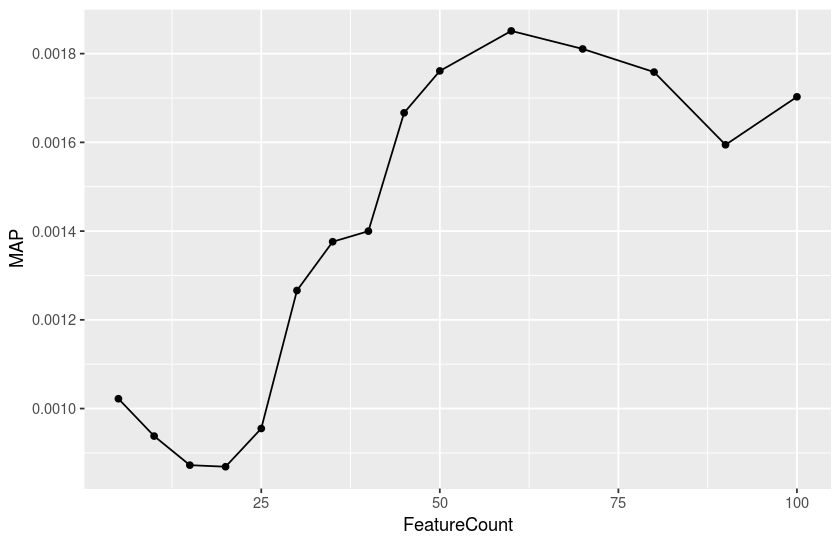

In [14]:
ggplot(results.explicit %>% filter(Algorithm=="FunkSVD")) +
    aes(x=FeatureCount, y=MAP) +
    geom_point() + geom_line()

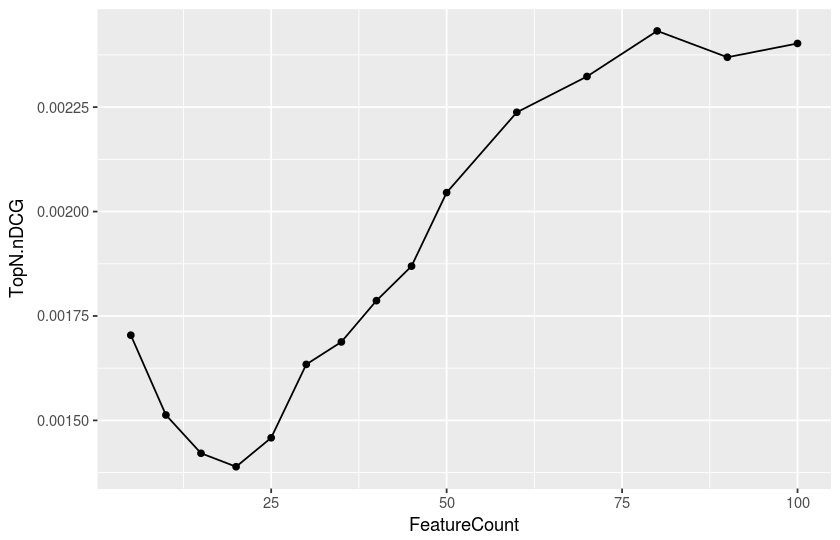

In [15]:
ggplot(results.explicit %>% filter(Algorithm=="FunkSVD")) +
    aes(x=FeatureCount, y=TopN.nDCG) +
    geom_point() + geom_line()

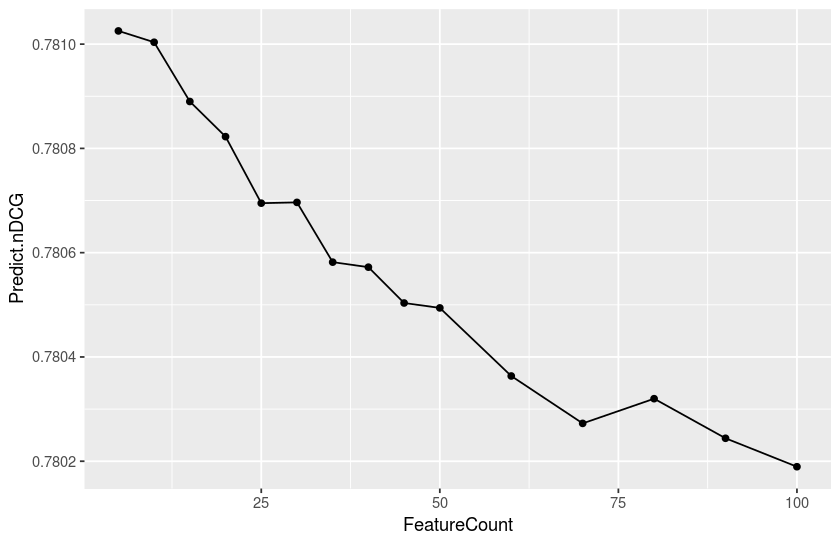

In [16]:
ggplot(results.explicit %>% filter(Algorithm=="FunkSVD")) +
    aes(x=FeatureCount, y=Predict.nDCG) +
    geom_point() + geom_line()

#### Results

Let's use **60** features.

### PF

In [ ]:
ggplot(results.explicit.pf %>% filter(Algorithm=="PF")) +
    aes(x=FeatureCount, y=RMSE.ByUser) +
    geom_point() + geom_line()

In [ ]:
ggplot(results.explicit.pf %>% filter(Algorithm=="PF")) +
    aes(x=FeatureCount, y=MAP) +
    geom_point() + geom_line()

In [ ]:
ggplot(results.explicit.pf %>% filter(Algorithm=="PF")) +
    aes(x=FeatureCount, y=TopN.nDCG) +
    geom_point() + geom_line()

In [ ]:
ggplot(results.explicit.pf %>% filter(Algorithm=="PF")) +
    aes(x=FeatureCount, y=Predict.nDCG) +
    geom_point() + geom_line()

## Implicit Feedback Recsys

In [29]:
results.implicit = read_csv("build/bx-implicit-sweep-results.csv")
results.implicit

Parsed with column specification:
cols(
  DataSet = col_character(),
  Algorithm = col_character(),
  FeatureCount = col_integer(),
  NNbrs = col_integer(),
  BuildTime = col_double(),
  TestTime = col_double(),
  TopN.nDCG = col_double(),
  MAP = col_double()
)


DataSet,Algorithm,FeatureCount,NNbrs,BuildTime,TestTime,TopN.nDCG,MAP
bx-implicit,Popular,NA,NA,0.126,280.653,NaN,0.0275296610
bx-implicit,FunkSVD,5,NA,17.835,514.071,NaN,0.0023827009
bx-implicit,FunkSVD,10,NA,33.888,653.060,NaN,0.0023842993
bx-implicit,FunkSVD,15,NA,83.161,765.781,NaN,0.0010217565
bx-implicit,FunkSVD,20,NA,138.252,868.644,NaN,0.0007949715
bx-implicit,FunkSVD,25,NA,150.413,938.087,NaN,0.0006026655
bx-implicit,FunkSVD,30,NA,183.245,986.339,NaN,0.0005462069
bx-implicit,ItemItem,NA,5,902.692,5308.040,NaN,0.0465582003
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
bx-implicit,UserUser,NA,80,0.018,5774.407,NaN,0.0676743655


### Summarize

In [30]:
unique(results.implicit$Algorithm)

[1] "Popular"  "FunkSVD"  "ItemItem" "UserUser"

### User-User CF

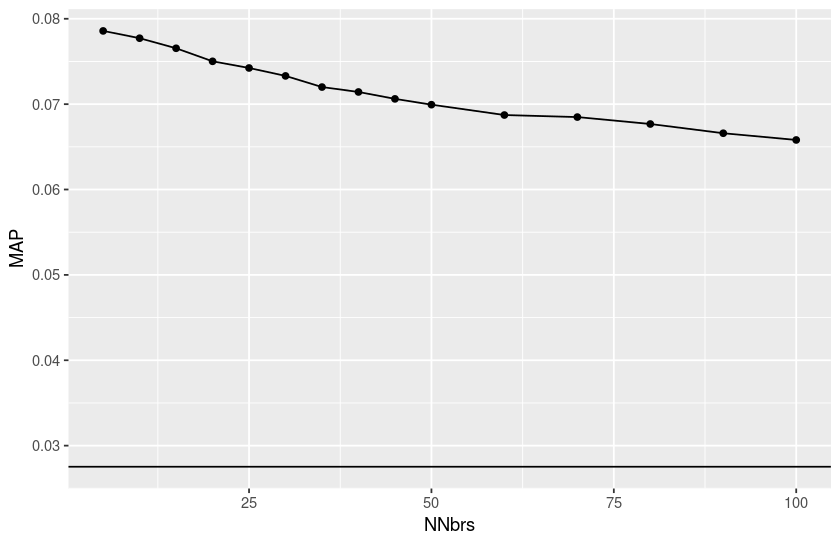

In [36]:
ggplot(results.implicit %>% filter(Algorithm=="UserUser")) +
    aes(x=NNbrs, y=MAP) +
    geom_point() + geom_line() +
    geom_hline(data=filter(results.implicit, Algorithm == "Popular"), mapping=aes(yintercept=MAP))

More neighbors = worse. Let's use 5.

## Item-Item CF

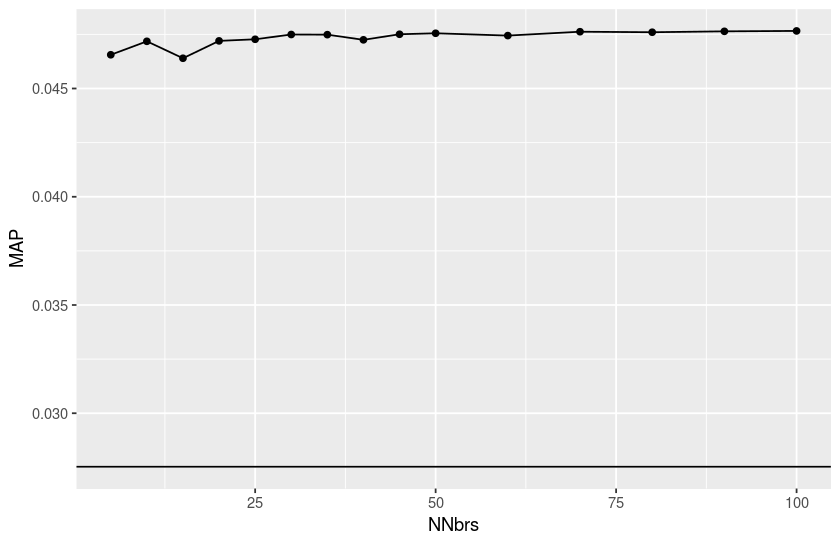

In [37]:
ggplot(results.implicit %>% filter(Algorithm=="ItemItem")) +
    aes(x=NNbrs, y=MAP) +
    geom_point() + geom_line() +
    geom_hline(data=filter(results.implicit, Algorithm == "Popular"), mapping=aes(yintercept=MAP))

Neighborhood count doesn't make much difference, but 15 is bad. Let's use 30.

### FunkSVD

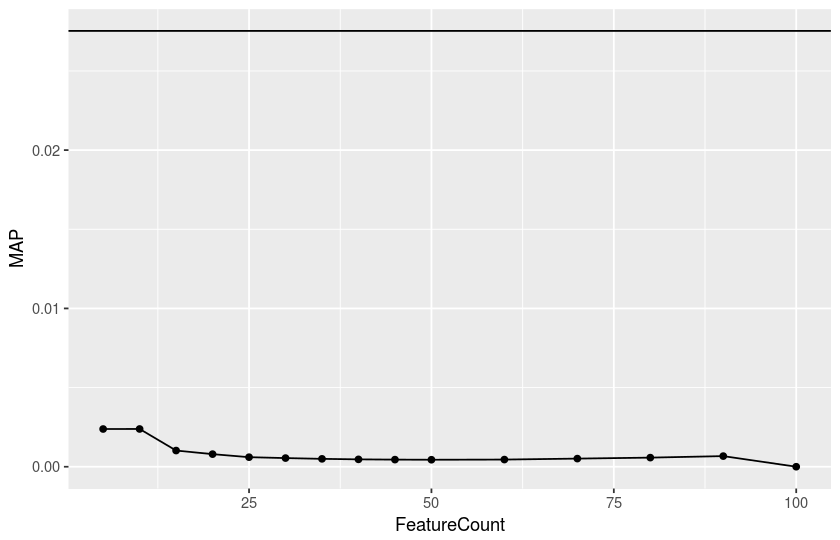

In [38]:
ggplot(results.implicit %>% filter(Algorithm=="FunkSVD")) +
    aes(x=FeatureCount, y=MAP) +
    geom_point() + geom_line() +
    geom_hline(data=filter(results.implicit, Algorithm == "Popular"), mapping=aes(yintercept=MAP))

Let's use 10 features? Or just keep using 55 from the implicit data, since there isn't a *lot* of difference.

### PF

In [ ]:
ggplot(results.implicit %>% filter(Algorithm=="PF-Implicit")) +
    aes(x=FeatureCount, y=MAP) +
    geom_point() + geom_line() +
    geom_hline(data=filter(results.implicit, Algorithm == "Popular"), mapping=aes(yintercept=MAP))